In [1]:
import os

network_path = os.path.join("networks", "FS_subthresh")

input_name = "CheckSubthresholdEntrainment"
sim_file_gj = os.path.join(network_path, "simulation", f"output-GJ-{input_name}.hdf5")
sim_file_nogj = os.path.join(network_path, "simulation", f"output-noGJ-{input_name}.hdf5")

input_config = f"{input_name}-input.json"
duration=2
osc_freq = 20

In [2]:
from snudda.init import SnuddaInit

from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=1337,
                 snudda_data="../../../../BasalGangliaData/data/")
cnc.define_striatum(num_dSPN=0, num_iSPN=0, num_FS=40, num_LTS=0, num_ChIN=0,
                    volume_type="cube", neuron_density=0.013*80500)
cnc.add_population_unit_random("Striatum", "FS", 1.0, 1)
cnc.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Writing networks/FS_subthresh/network-config.json


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json


In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, verbose=False)
sd.detect()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 114/343 (39 neurons)
Processing hyper voxel : 121/343 (38 neurons)
Processing hyper voxel : 163/343 (34 neurons)
Processing hyper voxel : 170/343 (33 neurons)
Processing hyper voxel : 115/343 (28 neurons)
Processing hyper voxel : 122/343 (25 neurons)
Processing hyper voxel : 113/343 (24 neurons)
Processing hyper voxel : 162/343 (23 neurons)
Processing hyper voxel : 65/343 (22 neurons)
Processing hyper voxel : 169/343 (22 neurons)
Processing hyper voxel : 72/343 (22 neurons)
Processing hyper voxel : 120/343 (22 neurons)
Processing hyper voxel : 164/343 (22 neurons)
Processing hyper voxel : 107/343 (21 neurons)
Processing hyper voxel : 171/343 (17 neurons)
Processing hyper voxel : 157/343 (15 neurons)
Processing hyper voxel : 156/343 (14 neurons)
Processing hyper voxel : 66/343 (13 neurons)
Processing hype

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

Read 5417 out of total 5417 synapses
Read 548 out of total 548 gapJunctions


!nrnivmodl $SNUDDA_DATA/neurons/mechanisms

In [6]:
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path, 
                 input_config_file=f"{input_name}-input.json",
                 verbose=False)
si.generate()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json
Loading 40 neurons with 488 synapses and 147 gap junctions
!!! Warning, combining definition of cortical_background input for neuron FS_3 0 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_0 1 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_2 2 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_1 3 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_3 4 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_1 5 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_0 6 (meta modified by input_config)
!!! Warning, combining definition of cortical_ba

Loading 40 neurons with 488 synapses and 147 gap junctions


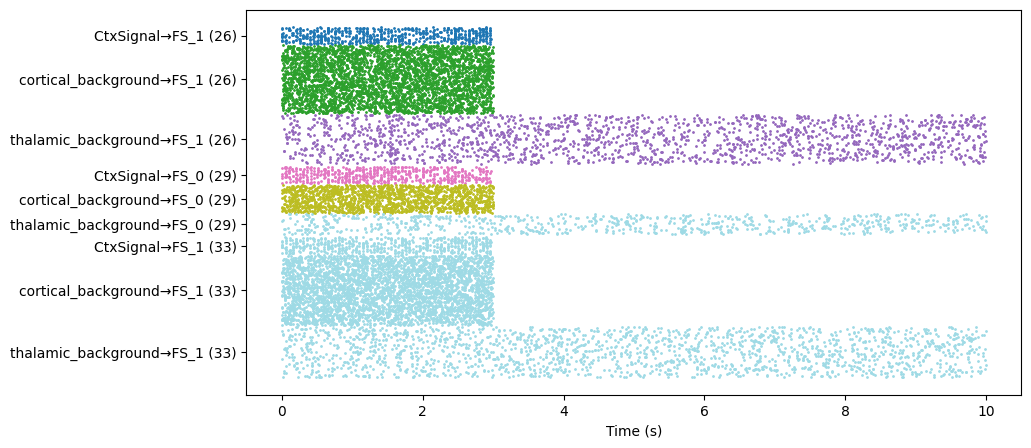

In [7]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file)
spi.plot_input(neuron_type="FS", num_neurons=3)

In [8]:
os.system(f"mpiexec -n 3 snudda simulate {network_path} --time {duration} --outputFile {sim_file_gj}")

numprocs=3
Using input file networks/FS_subthresh/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json
Worker waiting for master node to compile NEURON modules.
Using input file networks/FS_subthresh/input-spikes.hdf5
Using input file networks/FS_subthresh/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json
Running on master node:  nrnivmodl /home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms
Worker waiting for master node to compile NEURON modules.
/home/hjorth/HBP/Snudda/examples/notebooks/FS-network
Mod files: "/home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms//home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms/bk_ch.mod" "/home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms//home/hjorth/HBP/BasalGangliaData/data/neurons/mech

0

In [9]:
os.system(f"mpiexec -n 3 snudda simulate {network_path} --time {duration} --outputFile {sim_file_nogj} --disableGJ")

numprocs=3
Using input file networks/FS_subthresh/input-spikes.hdf5
Using input file networks/FS_subthresh/input-spikes.hdf5
Using input file networks/FS_subthresh/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_subthresh/network-config.json
Worker waiting for master node to compile NEURON modules.
Worker waiting for master node to compile NEURON modules.
Running on master node:  nrnivmodl /home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms
/home/hjorth/HBP/Snudda/examples/notebooks/FS-network
Mod files: "/home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms//home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms/bk_ch.mod" "/home/hjorth/HBP/BasalGangliaData/data/neurons/mechanisms//home/hjorth/HBP/BasalGangliaData/data/neurons/mech

0

In [10]:
from snudda.utils import SnuddaLoad
from snudda.utils import SnuddaLoadNetworkSimulation

sl = SnuddaLoad(network_path)
sls_gj = SnuddaLoadNetworkSimulation(network_simulation_output_file=sim_file_gj)
sls_nogj = SnuddaLoadNetworkSimulation(network_simulation_output_file=sim_file_nogj)

Loading 40 neurons with 488 synapses and 147 gap junctions
Loading networks/FS_subthresh/simulation/output-GJ-CheckSubthresholdEntrainment.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
3: (FS_1, pf9439e45, m9d1605c7)
8: (FS_1, p31916918, meffc0dfa)
17: (FS_0, pb1ef6b01, mb1b67bcc)
37: (FS_0, p4feff98b, m86da4874)
Loading networks/FS_subthresh/simulation/output-noGJ-CheckSubthresholdEntrainment.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
17: (FS_0, pb1ef6b01, mb1b67bcc)
26: (FS_1, pf9439e45, m48f576bb)
37: (FS_0, p4feff98b, m86da4874)


Loading network info from networks/FS_subthresh/network-synapses.hdf5
Loading 40 neurons with 488 synapses and 147 gap junctions
Loading input info from networks/FS_subthresh/input-spikes.hdf5
Loading networks/FS_subthresh/simulation/output-GJ-CheckSubthresholdEntrainment.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
3: (FS_1, pf9439e45, m9d1605c7)
8: (FS_1, p31916918, meffc0dfa)
17: (FS_0, pb1ef6b01, mb1b67bcc)
37: (FS_0, p4feff98b, m86da4874)
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Plotted 40 traces (total 40)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/FS-network/networks/FS_subthresh/figures/Network-voltage-trace--FS-traces.pdf


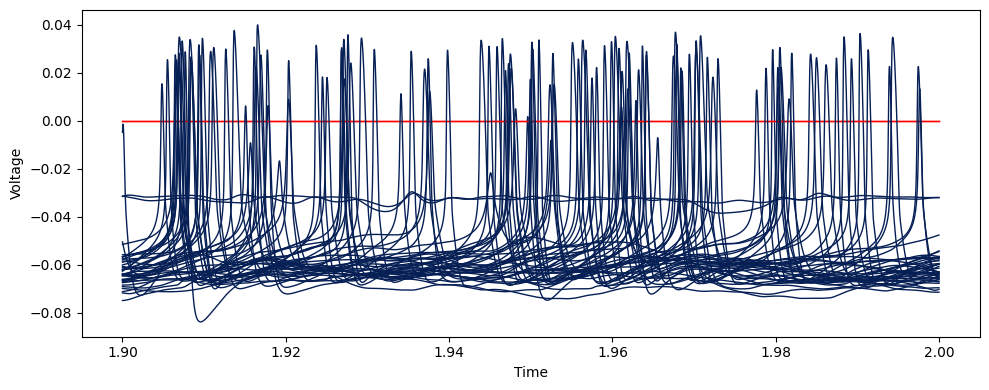

In [11]:
from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file=sim_file_gj)
ax = pt.plot_traces(offset=0, time_range=(1.9,2),fig_size=(10,4))

Loading network info from networks/FS_subthresh/network-synapses.hdf5
Loading 40 neurons with 488 synapses and 147 gap junctions
Loading input info from networks/FS_subthresh/input-spikes.hdf5
Loading networks/FS_subthresh/simulation/output-noGJ-CheckSubthresholdEntrainment.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
17: (FS_0, pb1ef6b01, mb1b67bcc)
26: (FS_1, pf9439e45, m48f576bb)
37: (FS_0, p4feff98b, m86da4874)
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Plotted 40 traces (total 40)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/FS-network/networks/FS_subthresh/figures/Network-voltage-trace--FS-traces.pdf


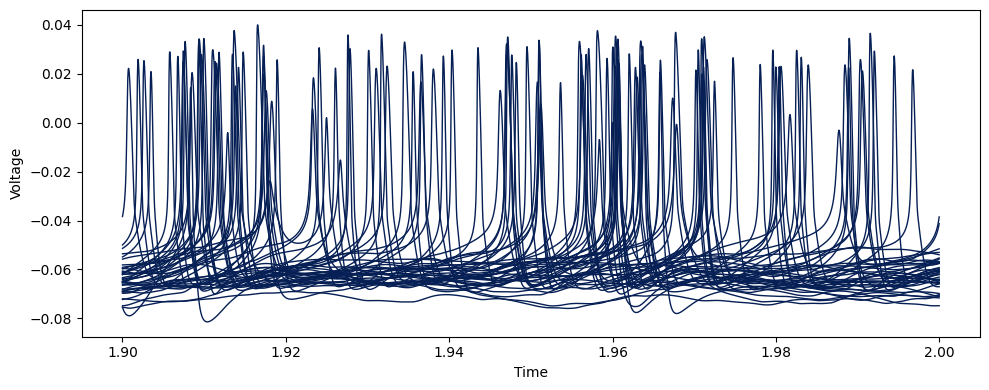

In [12]:
from snudda.plotting.plot_traces import PlotTraces
pt2 = PlotTraces(output_file=sim_file_nogj)
ax = pt2.plot_traces(offset=0, time_range=(1.9,2),fig_size=(10,4))

In [13]:
from snudda.plotting import SnuddaPlotSpikeRaster2
spr = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=sim_file_gj,
                             snudda_load=sl, snudda_simulation_load=sls_gj)

from snudda.plotting import SnuddaPlotSpikeRaster2
spr2 = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=sim_file_nogj,
                             snudda_load=sl, snudda_simulation_load=sls_nogj)

Writing figure to networks/FS_subthresh/figures/spike-period-histogram.pdf
Writing figure to networks/FS_subthresh/figures/spike-period-histogram.pdf


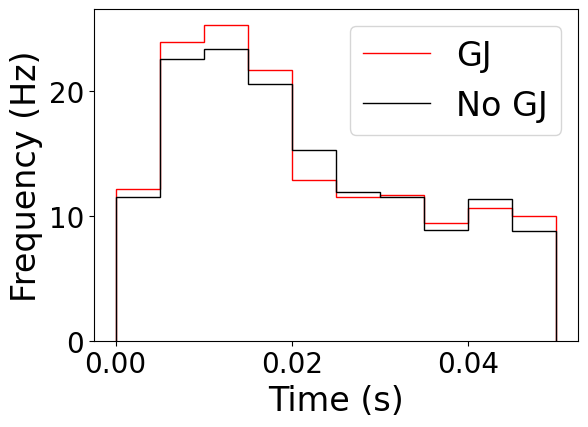

In [14]:
time_range_mod=(1,3)
ax, _, _ = spr.plot_period_histogram_mod(neuron_id=None, period=1/osc_freq, time_range=time_range_mod, show_figure=False, label="GJ", color="red",
                                         exclude_depolarisation_blocked_neurons=True)
ax, _, _ = spr2.plot_period_histogram_mod(neuron_id=None, period=1/osc_freq, time_range=time_range_mod, label="No GJ", ax=ax, color="black",
                                         exclude_depolarisation_blocked_neurons=True)


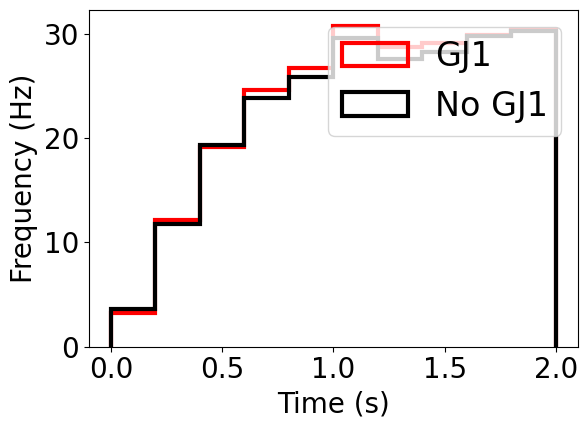

In [15]:
ax = spr.plot_spike_histogram(bin_size=200e-3, label_text="GJ", show_figure=False, colour="red")
ax = spr2.plot_spike_histogram(bin_size=200e-3, label_text="No GJ", ax=ax, colour="black")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Writing figure to networks/FS_subthresh/figures/spike-period-histogram.pdf


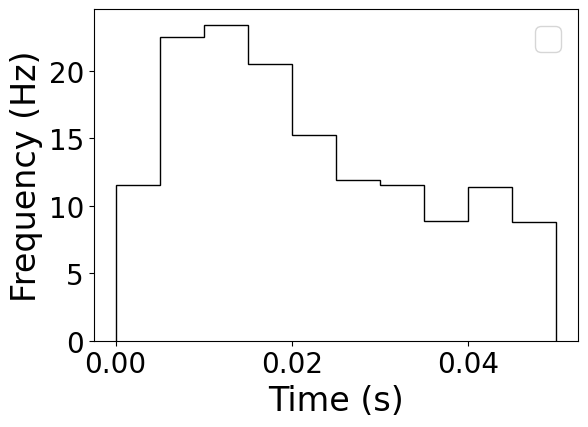

(<AxesSubplot:xlabel='Time (s)', ylabel='Frequency (Hz)'>,
 array([11.50575288, 22.51125563, 23.38669335, 20.51025513, 15.25762881,
        11.88094047, 11.50575288,  8.87943972, 11.38069035,  8.75437719]),
 array([4.27492763e-12, 4.99750000e-03, 9.99500000e-03, 1.49925000e-02,
        1.99900000e-02, 2.49875000e-02, 2.99850000e-02, 3.49825000e-02,
        3.99800000e-02, 4.49775000e-02, 4.99750000e-02]))

In [16]:
spr2.plot_period_histogram_mod(neuron_id=None, period=1/osc_freq, time_range=(1,3))

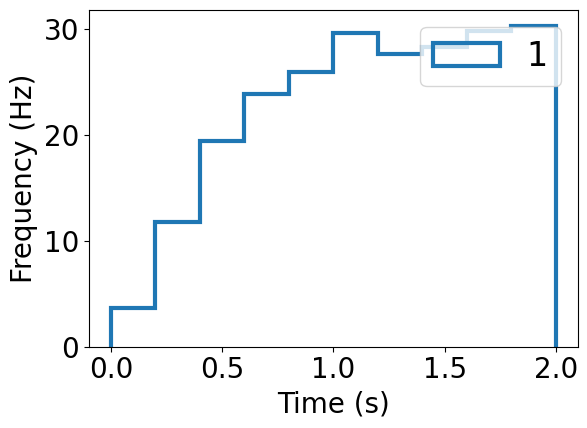

<AxesSubplot:xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [17]:
spr2.plot_spike_histogram(bin_size=200e-3)

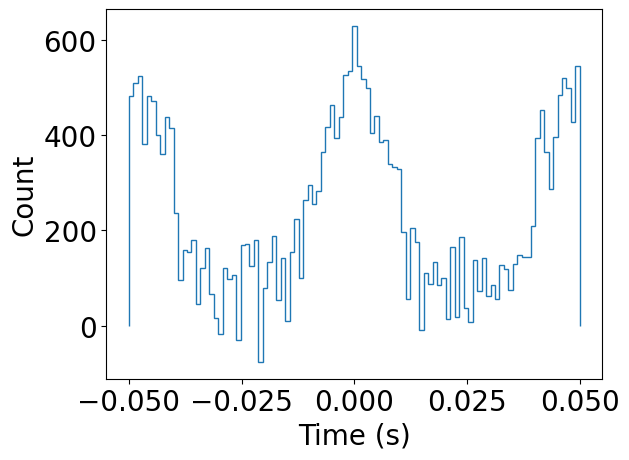

In [18]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc = PlotCrossCorrelogram(simulation_file=sim_file_gj, snudda_simulation_load=sls_gj)
pcc.plot_all_pair_cross_correlogram(neuron_id=None)

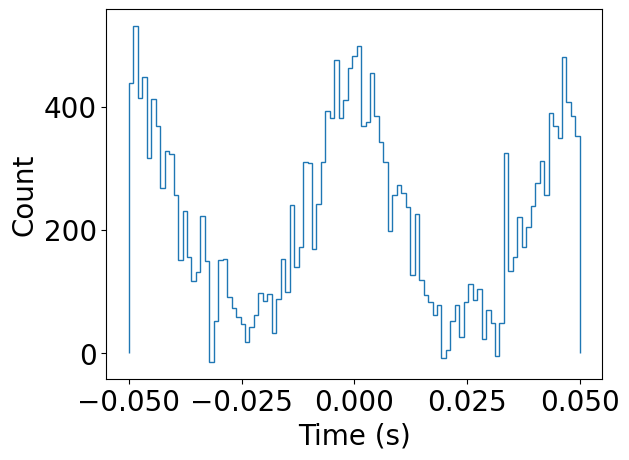

In [19]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc2 = PlotCrossCorrelogram(simulation_file=sim_file_gj, snudda_simulation_load=sls_nogj)
pcc2.plot_all_pair_cross_correlogram(neuron_id=None)

Saving figure to networks/FS_subthresh/figures/spike_raster.pdf


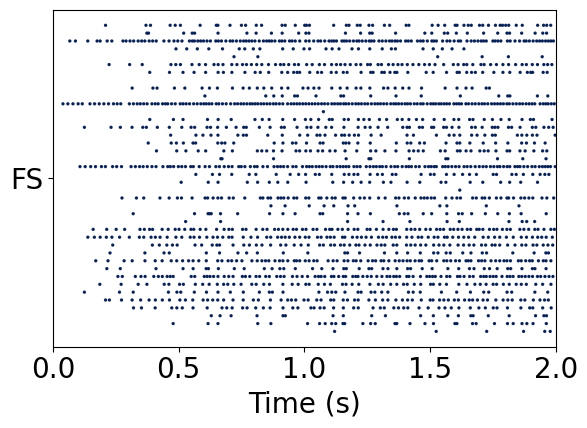

Saving figure to networks/FS_subthresh/figures/spike_raster.pdf


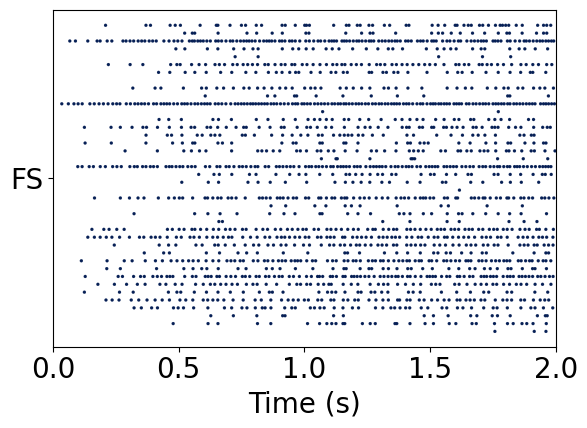

In [20]:
spr.plot_spike_raster()
spr2.plot_spike_raster()